# EN.553.436/646 Exam 1 (20 pts.)
## Guidelines
syntax is insufficient.- The test is open note and open internet, but do not communicate with anyone.
- When you are ready to start, record your start time.
- Finish the exam within a 75-minute time interval.
- When you are finished, complete the honor statement and upload your IPYNB and PDF to Canvas.
- The latest you may submit the test is 1:30pm, so plan your start time accordingly.
- Some questions ask for text responses. The graders will be looking for brief, incisive remarks that indicate depth of understanding. For commenting code, a literal description of the 

# <span style="color:red"> Honor Statement: </span>
This work was done entirely by me within the 75-minute time limit. I have not discussed test content with any other student and I will not do so during the test period.
## Signature: Qihua Gong
## Start Time: 11:00
## End Time: 12:00

# Dataset
Simon is employed by a bureau of civil engineering. He is analyzing the [Concrete Compressive Strength Dataset](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength) stored in `concrete.csv`. His goal is to assess the relation of eight attributes of concrete to the compressive strength of the concrete. 

Read and run the following code cell.

In [4]:
import pandas as pd

data = pd.read_csv("concrete.csv")
display(data)

# Predictors: attribtues of concrete.
X = data.iloc[:,:-1]
# Target: compressive strength.
y = data.iloc[:,-1]

,Cement[kg/m^3],Slag[kg/m^3],SlyAsh[kg/m^3],Water[kg/m^3],Superplasticizer[kg/m^3],CoarseAggregate[kg/m^3],FineAggregate[kg/m^3],Age[Day],Strength[MPa]
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# 1 (4 pts.)
0. Run the following code cell. 
1. Where indicated, name the method Simon is attempting to implement. (1 pt.) 
2. Where indicated, write a brief comment explaining the intent of the following code. (2 pts.)
3. In the Markdown cell below, give a brief, qualitative description of the distribution of `y` based on the plot. (1 pt.)

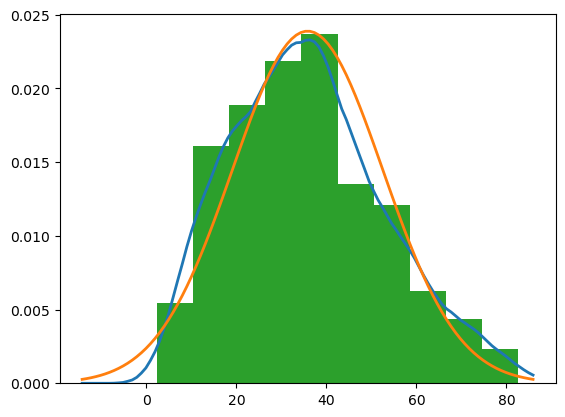

In [5]:
# METHOD: Kernal Density estimation

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# COMMENT: define the kernel density in a quadratic model
def K(u):
    return (3/4)*(1-u**2)*(np.abs(u)<=1)

# COMMENT: scale the previous function
def Kh(u, h):
    return (1/h)*K(u/h)

# COMMENT: sum the scaled kernels to calculate the Kernal Density estimation
def f(u, h):
    tmp = 0
    for y_i in y:
        tmp += Kh(u-y_i, h)
    return tmp/len(y)

# COMMENT: Do the PDF with the same mean and histogram, then compare with the kernal estimation before
u = np.linspace(np.mean(y)-3*np.std(y), np.mean(y)+3*np.std(y), 100)
plt.plot(u, f(u,10),linewidth=2)
plt.plot(u, stats.norm(loc=np.mean(y), scale=np.std(y)).pdf(u), linewidth=2)
plt.hist(y, density=True, bins=10)
plt.show()

## <span style="color:red">1.3 Description:</span> [YOUR ANSWER HERE.]  
Answer: After the comparison with the normal PDF, we can see that the kernel density estimatiion is overfitting to the data

# 2 (8 pts.)
0. Run the following code cell. 
1. Where indicated, name the method Simon is attempting to implement. (1 pt.) 
2. Where indicated, write a brief comment explaining the intent of the following code. (2 pts.)
3. Simon made a comment at the bottom of the code cell. Explain that comment in the Markdown cell that follows. (3 pts.)
4. There is a mistake in the code. Fix the mistake by modifying exactly one line. Comment your correction. Run the cell to get the correct output. (2 pts.)

0.285012420169039


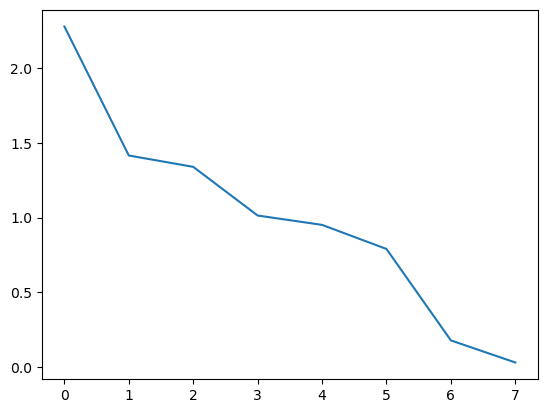

In [15]:
# METHOD: PCA

# COMMENT: compute the covariance matrix
#S = X.T @ X / (X.shape[0]-1) #modifying
S = ((X - X.mean())/X.std()).T @ ((X - X.mean())/X.std()) / (X.shape[0]-1) 
# To calculate the covariance matrix, we need to calculate the mean and difference first, can't use the raw X matrix
# COMMENT: calculate the eigenvalues and eigenvectors
w, v = np.linalg.eigh(S)
# SIMON: Sorts array in descending order. It was in ascending order by default.
w = np.flip(w)
# COMMENT: print the eigenvalue of the first principal component
print(w[0]/np.sum(w))
# COMMENT: plot eigenvalues
plt.plot(w)
plt.show()

# SIMON: From the output, X is virtually one-dimensional!

## <span style="color:red">2.3 Explanation:</span> [YOUR ANSWER HERE.]  
Answer: He used wrong scale to calculate the covariance matrix and the correlation matrix. So, he get a wrong plot of 0.97 PC1 and a lot of 0 in the other PCs that is why he thought only PC1 is meaningful and the X is one-dimensional. After we correct the way of calculate the covariance matrix, we can see that PCs are all meaningfull.

# 3 (8 pts.)
0. Read and run the following code cell. 
1. Where indicated, write a brief comment explaining the intent of the following code. (4 pts.)
2. In the indicated space in `assess`, write code that will perform a linear regression to fit the coefficients of a linear model to predict `y` given `M`. Apply the model to generate predictions `y_pred` as a function of `M`. Comment your code.  (4 pts.)

107.19723607482689


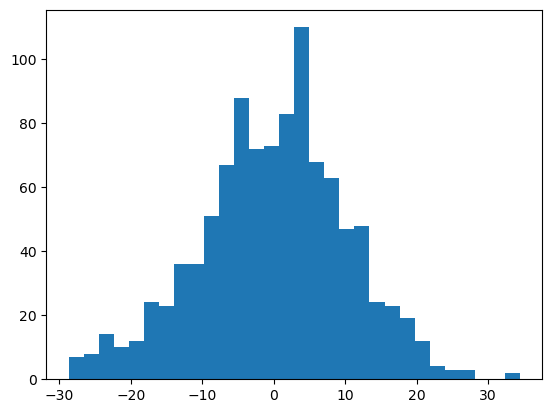

Running pca...
207.58044110036496


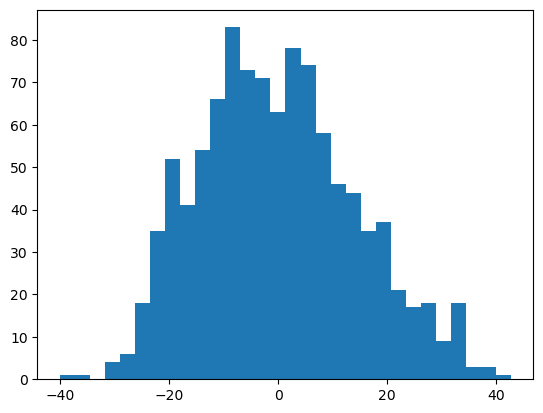

Running method augment_with_quadratic...
67.93349436115673


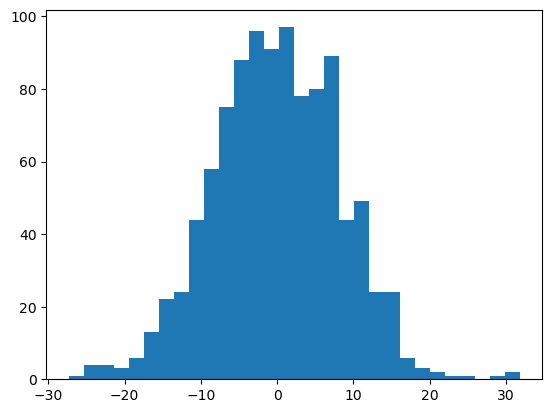

Running method augment_with_quadratic...
Running pca...
210.12488583372544


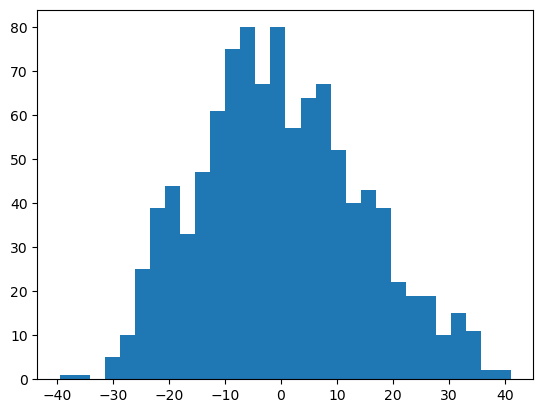

In [18]:
# METHOD: Linear Regression 

from sklearn.decomposition import PCA

# COMMENT: Build matrix M
def setup(df, augment_with_quadratic=False, pca=False):
    M = df.values
    
    # COMMENT: Calculate the M matrix with method augment_with_quadratic
    if augment_with_quadratic:
        print("Running method augment_with_quadratic...")
        for i in range(df.shape[1]-1):
            for j in range(i+1, df.shape[1]):
                M = np.hstack((M, M[:,i:(i+1)]*M[:,j:(j+1)]))
    
    # COMMENT:  Calculate the M matrix PCA          
    if pca:
        print("Running pca...")
        pca = PCA(n_components=2)
        M = pca.fit_transform(M)
        
    # COMMENT: Add a column of ones to the matrix M
    M = np.hstack((np.ones([M.shape[0], 1]), M))
    return M

# COMMENT: Define assessment function and plot
def assess(M):
    # this is placeholder to prevent error messages. you should overwrite y_pred with your linear regression code.
    #y_pred = np.zeros(y.shape) #placeholder
    # COMPLETE CODE: 
    y_pred = M @ np.linalg.pinv(M.T @ M) @ M.T @ y
     #calcualte the prediction, just write them together 
     # #basically from three equation: Xpinv = np.linalg.inv(X.T @ X) @ X.T, bHat = Xpinv @ y, yHat = X @ bHat
    # COMMENT: Calculate the error
    e = y - y_pred
    print(np.mean(e**2))
    # COMMENT: Plot the error in a histogram
    plt.hist(e, bins=30)
    plt.show() 
    return

# COMMENT: access the data by the method from four situation: raw, pca, augment_with_quadratic and both PCA and augment_with_quadratic
assess(setup(X))
assess(setup(X, pca=True))
assess(setup(X, augment_with_quadratic=True))
assess(setup(X, augment_with_quadratic=True, pca=True))
